In [1]:
# manipulação de dados
import pandas as pd
import sidetable as stb
import numpy as np
from ydata_profiling import ProfileReport

# análise gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# modelagem
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_val_predict
from sklearn import tree
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA

# métricas
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
#Settings
# pd.set_option("display.precision", 2)
# pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

### Entendendo as features
- person_age = idade
- person_income = rendimento anual
- person_home_ownership = tem casa própria? mora de aluguel?
- person_emp_length = quatidade de tempo de empresa (anos)
- loan_intent = motivo do empréstimo
- loan_grade = grau do empréstimo
- loan_amnt = valor do empréstimo
- loan_int_rate = taxa interna de empréstimo
- loan_status = status do empréstimo
- loan_percent_income = taxa do empréstimo
- cb_person_default_on_file = histórico padrão
- cb_preson_cred_hist_length = tamanho do histórico de empréstimo da pessoa (anos)

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Criando um relatório inicial com Pandas Profiling

In [4]:
# profile = ProfileReport(df, title='Análise Empréstimo')
# profile.to_file('Análise Empréstimo.html')

### Verificando se há valores missing e se o tipo de dado da coluna está correto

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.stb.missing(style=True)

,missing,total,percent
loan_int_rate,"3,116","32,581",9.56%
person_emp_length,895,"32,581",2.75%
person_age,0,"32,581",0.00%
person_income,0,"32,581",0.00%
person_home_ownership,0,"32,581",0.00%
loan_intent,0,"32,581",0.00%
loan_grade,0,"32,581",0.00%
loan_amnt,0,"32,581",0.00%
loan_status,0,"32,581",0.00%
loan_percent_income,0,"32,581",0.00%


### Verificando informações estatísticas

In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
loan_status,32581,2,0,25473,1,7108
cb_person_default_on_file,32581,2,N,26836,Y,5745
person_home_ownership,32581,4,RENT,16446,OTHER,107
loan_intent,32581,6,EDUCATION,6453,HOMEIMPROVEMENT,3605
loan_grade,32581,7,A,10777,G,64
cb_person_cred_hist_length,32581,29,2,5965,29,14
person_emp_length,31686,36,0.0,4105,41.0,1
person_age,32581,58,23,3889,78,1
loan_percent_income,32581,77,0.1,1533,0.62,1
loan_int_rate,29465,348,7.51,756,22.48,1


### Análise univariada

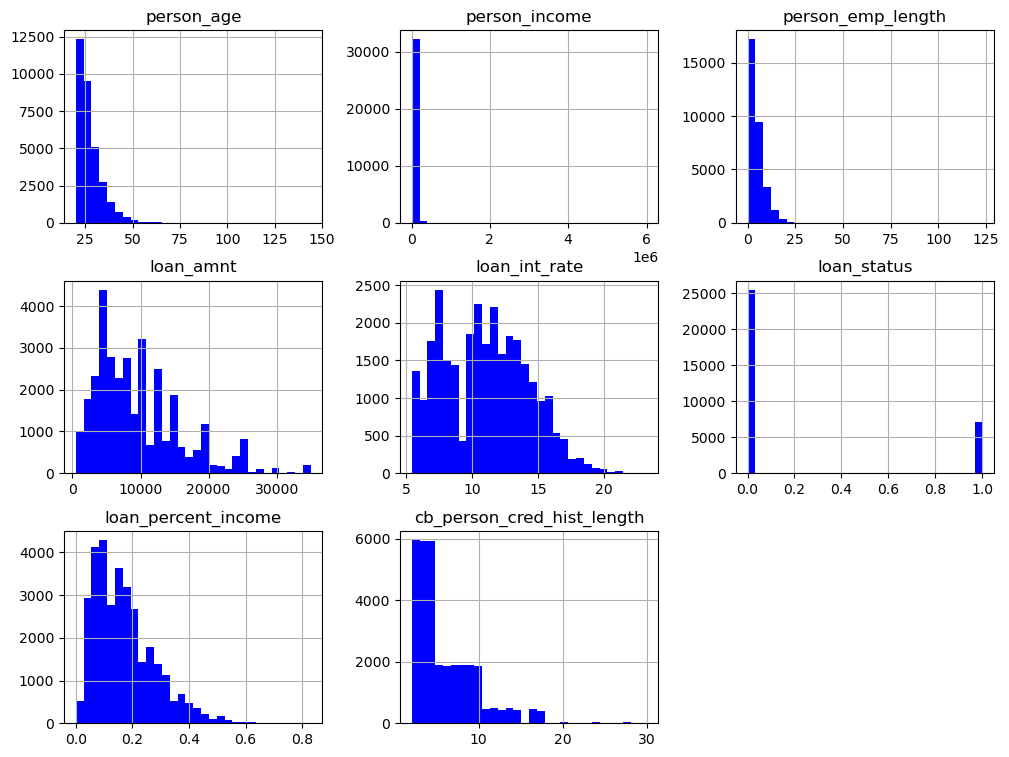

In [9]:
df.hist(bins = 30, figsize = (12,9) , color = 'b');

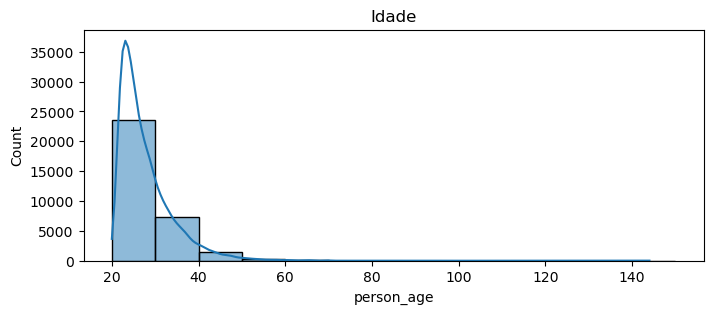

In [10]:
_ = plt.figure(figsize=(8,3))
_ = sns.histplot(df['person_age'], binwidth=10, kde=True)
_ = plt.title('Idade')

In [11]:
df.loc[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


### Foram encontrados 5 registros com idade acima de 100 anos, entre 120 e 145

In [12]:
# excluindo os registros
df = df.loc[df['person_age'] < 100]

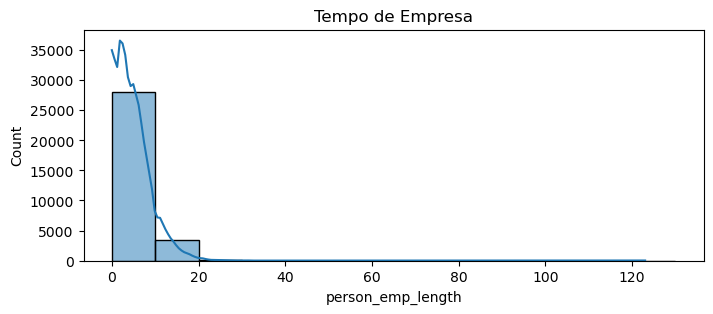

In [13]:
_ = plt.figure(figsize=(8,3))
_ = sns.histplot(df['person_emp_length'], binwidth=10, kde=True)
_ = plt.title('Tempo de Empresa')

In [14]:
df.loc[df['person_emp_length'] > 50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


### Encontrados 2 registros com tempo de empresa igual a 123 anos

In [15]:
# excluindo os registros
df = df.loc[df['person_emp_length'] != 123.00]

### Verificando se há alguma relação considerável entre as features

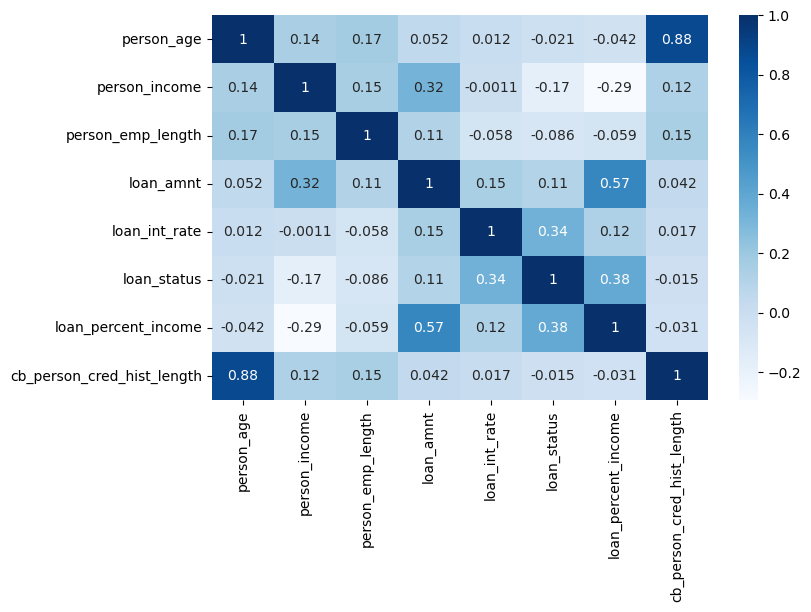

In [16]:
_ = plt.figure(figsize = (8,5))
_ = sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Há uma relação considerável entre idade e o tempo de histórico

### Verificando se há outliers na renda anual

<Axes: xlabel='person_income'>

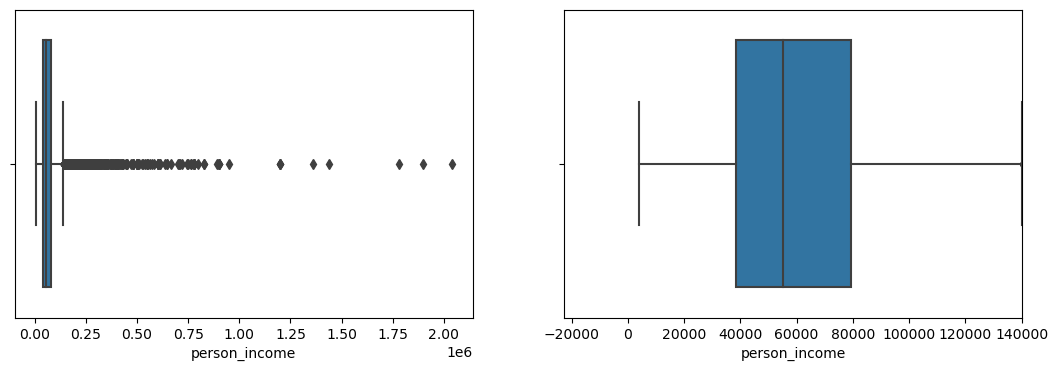

In [17]:
q1 = df['person_income'].quantile(0.25)
q3 = df['person_income'].quantile(0.75)
amplitude = q3 - q1

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(13,4)
sns.boxplot(x=df['person_income'], ax=ax1)
ax2.set_xlim(q1 - 1.5 * amplitude, q3 + 1.5 * amplitude)
sns.boxplot(x=df['person_income'], ax=ax2)

### Verificado que existem pessoas com renda muito superior a média

In [18]:
# excluindo o registros
qtd_linhas = df.shape[0]
lim_inf = q1 - 1.5 * amplitude
lim_sup = q3 + 1.5 * amplitude
df = df.loc[(df['person_income'] >= lim_inf) & (df['person_income'] <= lim_sup), :]
linhas_removidas = qtd_linhas - df.shape[0]
print(f'{linhas_removidas} registros removidos da base de dados')

1480 registros removidos da base de dados


In [19]:
df.stb.freq(['person_home_ownership'], style=True)

,person_home_ownership,count,percent,cumulative_count,cumulative_percent
0,RENT,"16,099",51.78%,"16,099",51.78%
1,MORTGAGE,"12,426",39.96%,"28,525",91.74%
2,OWN,"2,469",7.94%,"30,994",99.68%
3,OTHER,100,0.32%,"31,094",100.00%


### Verificado que mais de 91% das pessoas moram de aluguel ou possui hipotéca

In [20]:
df.stb.freq(['loan_intent'], style=True)

,loan_intent,count,percent,cumulative_count,cumulative_percent
0,EDUCATION,"6,200",19.94%,"6,200",19.94%
1,MEDICAL,"5,846",18.80%,"12,046",38.74%
2,VENTURE,"5,444",17.51%,"17,490",56.25%
3,PERSONAL,"5,259",16.91%,"22,749",73.16%
4,DEBTCONSOLIDATION,"4,955",15.94%,"27,704",89.10%
5,HOMEIMPROVEMENT,"3,390",10.90%,"31,094",100.00%


### Verificado que não há discrepancia no propósito do empréstimo

In [21]:
df.stb.freq(['loan_grade'], style=True)

,loan_grade,count,percent,cumulative_count,cumulative_percent
0,A,"10,343",33.26%,"10,343",33.26%
1,B,"9,922",31.91%,"20,265",65.17%
2,C,"6,191",19.91%,"26,456",85.08%
3,D,"3,458",11.12%,"29,914",96.21%
4,E,899,2.89%,"30,813",99.10%
5,F,221,0.71%,"31,034",99.81%
6,G,60,0.19%,"31,094",100.00%


In [22]:
df.stb.freq(['loan_status','loan_grade'], style=True)

,loan_status,loan_grade,count,percent,cumulative_count,cumulative_percent
0,0,A,"9,274",29.83%,"9,274",29.83%
1,0,B,"8,245",26.52%,"17,519",56.34%
2,0,C,"4,860",15.63%,"22,379",71.97%
3,1,D,"2,077",6.68%,"24,456",78.65%
4,1,B,"1,677",5.39%,"26,133",84.05%
5,0,D,"1,381",4.44%,"27,514",88.49%
6,1,C,"1,331",4.28%,"28,845",92.77%
7,1,A,"1,069",3.44%,"29,914",96.21%
8,1,E,590,1.90%,"30,504",98.10%
9,0,E,309,0.99%,"30,813",99.10%


### Verificado que não temos informação exata de como tratar a grade do empréstimo e não possuí uma influência no empréstimo, tendo em vista que mais de 33% são da grade A, porém apenas pouco mais de 3% do empréstimos solicitados para a grade A são aceitos.

In [23]:
df = df.drop('loan_grade', axis = 1)

In [24]:
df.stb.freq(['cb_person_default_on_file'], style=True)

,cb_person_default_on_file,count,percent,cumulative_count,cumulative_percent
0,N,"25,624",82.41%,"25,624",82.41%
1,Y,"5,470",17.59%,"31,094",100.00%


In [25]:
df.stb.freq(['loan_status','cb_person_default_on_file'], style=True)

,loan_status,cb_person_default_on_file,count,percent,cumulative_count,cumulative_percent
0,0,N,"20,772",66.80%,"20,772",66.80%
1,1,N,"4,852",15.60%,"25,624",82.41%
2,0,Y,"3,360",10.81%,"28,984",93.21%
3,1,Y,"2,110",6.79%,"31,094",100.00%


### Verificado que a feature cb_person_default_on_file parece influenciar na decisão do empréstimo, pois apenas 15% das pessoas que não tem histórico conseguiu empréstimo

### Aplicando o escalonamento

In [26]:
df.shape

(31094, 11)

In [27]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income']])
df_scaler = pd.DataFrame(df_scaler, columns=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income'])
df = df.drop(['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income'], axis=1)

In [28]:
df.reset_index(inplace = True, drop = True)
df_scaler.reset_index(inplace = True, drop = True)
df_final = pd.concat([df, df_scaler], axis=1)
df_final.head()

,person_home_ownership,loan_intent,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
0,OWN,EDUCATION,0,N,2,-1.072125,-1.784326,0.074722,-1.373019,0.044531,-0.694323
1,MORTGAGE,MEDICAL,1,N,3,-0.421657,-1.784326,-0.935828,-0.627550,0.579077,3.697255
2,RENT,MEDICAL,1,N,2,-0.746891,0.246964,-0.177916,4.259412,1.308284,3.323504
3,RENT,MEDICAL,1,Y,4,-0.584274,-0.156387,0.832634,4.259412,1.011657,3.510379
4,OWN,VENTURE,1,N,2,-1.072125,-1.773425,-0.683191,-1.124529,-1.191414,0.707245


### Tratando valores missing

In [29]:
df_final.stb.missing(style=True)

,missing,total,percent
loan_int_rate,"2,977","31,094",9.57%
person_emp_length,881,"31,094",2.83%
person_home_ownership,0,"31,094",0.00%
loan_intent,0,"31,094",0.00%
loan_status,0,"31,094",0.00%
cb_person_default_on_file,0,"31,094",0.00%
cb_person_cred_hist_length,0,"31,094",0.00%
person_age,0,"31,094",0.00%
person_income,0,"31,094",0.00%
loan_amnt,0,"31,094",0.00%


In [30]:
df_final['loan_int_rate'] = df_final['loan_int_rate'].fillna(df_final['loan_int_rate'].median())
df_final['person_emp_length'] = df_final['person_emp_length'].fillna(df_final['person_emp_length'].median())

### Transformando em binário a feature default_history

In [31]:
df_final['default_history'] = np.where(df_final['cb_person_default_on_file'] == 'N',0,1)

df_final = df_final.drop('cb_person_default_on_file',axis=1)

In [32]:
df_final.head()

,person_home_ownership,loan_intent,loan_status,cb_person_cred_hist_length,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,default_history
0,OWN,EDUCATION,0,2,-1.072125,-1.784326,0.074722,-1.373019,0.044531,-0.694323,0
1,MORTGAGE,MEDICAL,1,3,-0.421657,-1.784326,-0.935828,-0.627550,0.579077,3.697255,0
2,RENT,MEDICAL,1,2,-0.746891,0.246964,-0.177916,4.259412,1.308284,3.323504,0
3,RENT,MEDICAL,1,4,-0.584274,-0.156387,0.832634,4.259412,1.011657,3.510379,1
4,OWN,VENTURE,1,2,-1.072125,-1.773425,-0.683191,-1.124529,-1.191414,0.707245,0


### Criando OneHotEncoder para tratar as variáveis categóricas

In [33]:
encoder = ce.OneHotEncoder(cols=df_final[['person_home_ownership','loan_intent']])
df_final = encoder.fit_transform(df_final)
df_final.head()

,person_home_ownership_1,person_home_ownership_2,person_home_ownership_3,person_home_ownership_4,loan_intent_1,loan_intent_2,loan_intent_3,loan_intent_4,loan_intent_5,loan_intent_6,loan_status,cb_person_cred_hist_length,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,default_history
0,1,0,0,0,1,0,0,0,0,0,0,2,-1.072125,-1.784326,0.074722,-1.373019,0.044531,-0.694323,0
1,0,1,0,0,0,1,0,0,0,0,1,3,-0.421657,-1.784326,-0.935828,-0.627550,0.579077,3.697255,0
2,0,0,1,0,0,1,0,0,0,0,1,2,-0.746891,0.246964,-0.177916,4.259412,1.308284,3.323504,0
3,0,0,1,0,0,1,0,0,0,0,1,4,-0.584274,-0.156387,0.832634,4.259412,1.011657,3.510379,1
4,1,0,0,0,0,0,1,0,0,0,1,2,-1.072125,-1.773425,-0.683191,-1.124529,-1.191414,0.707245,0


In [34]:
X = df_final.drop('loan_status',axis=1)
y = df_final['loan_status']

## Aplicando redimensionamento
Apesar de não ser utilizado, pois foram realizados testes e os resultados foram inferiores.

In [35]:
# pca = PCA(n_components = 8)
# df_pca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_.sum())

# kpca = KernelPCA(n_components=6, kernel = 'rbf')
# df_kpca = kpca.fit_transform(X)
# print(kpca.explained_variance_ratio_.sum())

## Localizando os melhores parametros para os modelos.
### Como meu computador é fraco, serão feitos testes com poucos parâmetros

### DecisionTree

In [36]:
params_tree = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

In [37]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_tree, error_score='raise')
grid_search.fit(X, y)
best_params_tree = grid_search.best_params_
best_score_tree = grid_search.best_score_
print(best_params_tree)
print(best_score_tree)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
0.8831937021974443


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     24132
           1       0.75      0.63      0.68      6962

    accuracy                           0.87     31094
   macro avg       0.82      0.78      0.80     31094
weighted avg       0.86      0.87      0.86     31094



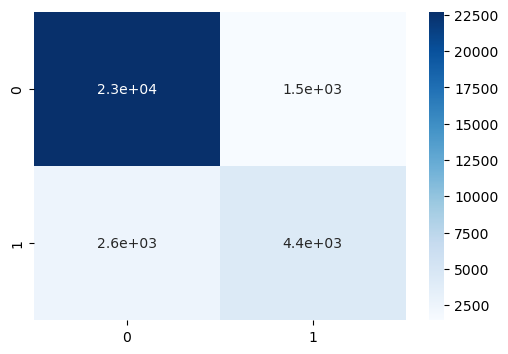

In [72]:
y_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 10, min_samples_split = 2, splitter = 'random'), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

### RandomForest

In [39]:
params_random = {
    'criterion': ['gini','entropy'],
    'n_estimators': [10,40,100,150],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

In [40]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_random, error_score='raise')
grid_search.fit(X, y)
best_params_random = grid_search.best_params_
best_score_random = grid_search.best_score_
print(best_params_random)
print(best_score_random)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 40}
0.9095968574085651


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     24132
           1       0.89      0.66      0.76      6962

    accuracy                           0.91     31094
   macro avg       0.90      0.82      0.85     31094
weighted avg       0.90      0.91      0.90     31094



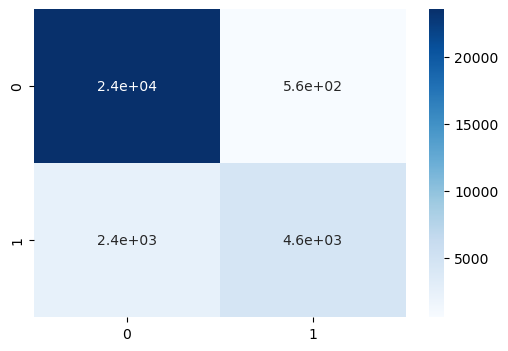

In [41]:
y_pred = cross_val_predict(RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 2, n_estimators = 150), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

### LogisticRegression

In [42]:
params_logistic = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0, 1.5, 2.0],
    'solver': ['lbfgs','sag','saga']
}

In [43]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=params_logistic)
grid_search.fit(X, y)
best_params_logistic = grid_search.best_params_
best_score_logistic = grid_search.best_score_
print(best_params_logistic)
print(best_score_logistic)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.8387468475998624


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     24132
           1       0.72      0.46      0.56      6962

    accuracy                           0.84     31094
   macro avg       0.79      0.71      0.73     31094
weighted avg       0.83      0.84      0.83     31094



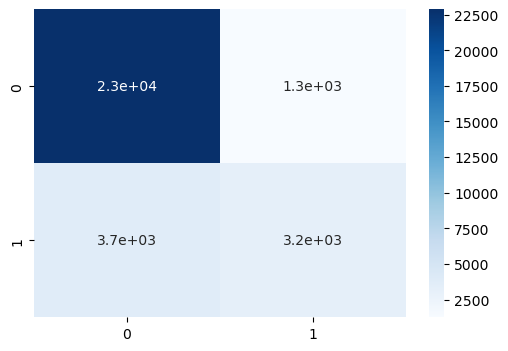

In [44]:
y_pred = cross_val_predict(LogisticRegression(C = 1.5, solver = 'lbfgs', tol = 0.0001), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

### KNN

In [45]:
params_knn = {
    'n_neighbors': [3,5,10,20],
    'p': [1,2]
}

In [46]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_knn, error_score='raise')
grid_search.fit(X, y)
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_
print(best_params_knn)
print(best_score_knn)

{'n_neighbors': 20, 'p': 1}
0.8514180673871576


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     24132
           1       0.86      0.38      0.52      6962

    accuracy                           0.85     31094
   macro avg       0.85      0.68      0.72     31094
weighted avg       0.85      0.85      0.82     31094



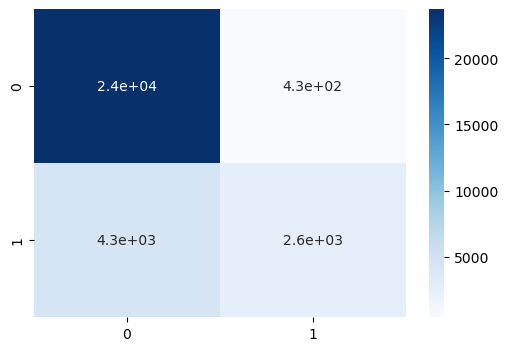

In [47]:
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 20, p = 1), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

### SVM

In [48]:
params_svm = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0, 1.5, 2.0],
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [49]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=params_svm, error_score='raise')
grid_search.fit(X, y)
best_params_svm = grid_search.best_params_
best_score_svm = grid_search.best_score_
print(best_params_svm)
print(best_score_svm)

{'C': 2.0, 'kernel': 'poly', 'tol': 0.0001}
0.8441489731170174


              precision    recall  f1-score   support

           0       0.86      0.97      0.91     24132
           1       0.80      0.47      0.59      6962

    accuracy                           0.85     31094
   macro avg       0.83      0.72      0.75     31094
weighted avg       0.85      0.85      0.84     31094



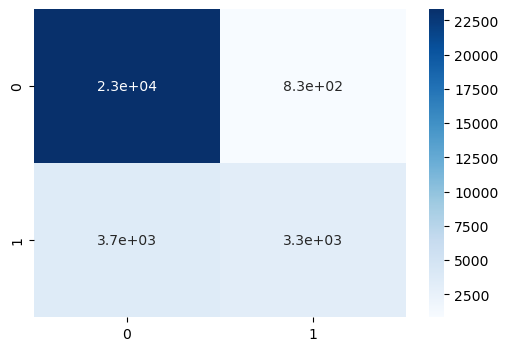

In [50]:
y_pred = cross_val_predict(SVC(C = 1.5, kernel = 'rbf', tol = 0.000001), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

### Neural Network

In [51]:
params_neural = {
    'activation': ['relu'],
    'solver': ['adam'],
    'batch_size': [10,56],
    'max_iter': [3000],
    'tol': [0.000001],
    'hidden_layer_sizes': [(5,5),(10,10)]
}

In [52]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=params_neural, error_score='raise')
grid_search.fit(X, y)
best_params_neural = grid_search.best_params_
best_score_neural = grid_search.best_score_
print(best_params_neural)
print(best_score_neural)

{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (10, 10), 'max_iter': 3000, 'solver': 'adam', 'tol': 1e-06}
0.8971827068305757


              precision    recall  f1-score   support

           0       0.90      0.97      0.93     24132
           1       0.85      0.61      0.71      6962

    accuracy                           0.89     31094
   macro avg       0.87      0.79      0.82     31094
weighted avg       0.89      0.89      0.88     31094



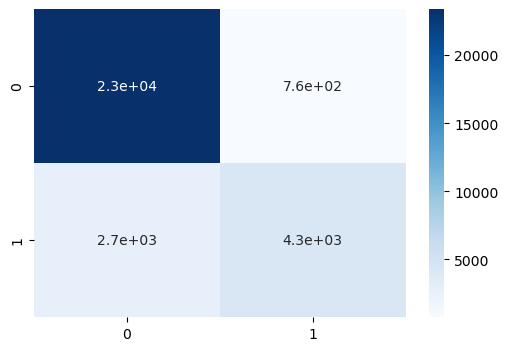

In [60]:
y_pred = cross_val_predict(MLPClassifier(activation = 'relu', batch_size = 56, hidden_layer_sizes = (5, 5), max_iter = 3000, solver = 'adam', tol = 0.000001), X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
print(cr)

## Resultados dos modelos
### - Decision Tree - 0.88
### - Random Forest - 0.91
### - Logistic Regression - 0.84
### - KNN - 0.85
### - SVM - 0.84
### - Neural Network - 0.90

## Realizando a validação cruzada.

In [54]:
tree_score = []
random_score = []
logistic_score = []
knn_score = []
svm_score = []
neural_score = []

for i in range(20):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    tree = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 10, min_samples_split = 2, splitter = 'random')
    scores = cross_val_score(tree, X, y, cv = kfold)
    tree_score.append(scores.mean())
    
    random = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 2, n_estimators = 150)
    scores = cross_val_score(random, X, y, cv = kfold)
    random_score.append(scores.mean())
    
    logistic = LogisticRegression(C = 1.5, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(logistic, X, y, cv = kfold)
    logistic_score.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
    scores = cross_val_score(knn, X, y, cv = kfold)
    knn_score.append(scores.mean())
    
    svm = SVC(C = 1.5, kernel = 'rbf', tol = 0.000001)
    scores = cross_val_score(svm, X, y, cv = kfold)
    svm_score.append(scores.mean())
    
    neural = MLPClassifier(activation = 'relu', batch_size = 56, hidden_layer_sizes = (5, 5), max_iter = 3000, solver = 'adam', tol = 0.000001)
    scores = cross_val_score(neural, X, y, cv = kfold)
    neural_score.append(scores.mean())

In [55]:
results = pd.DataFrame({
    'Tree': tree_score, 'Random': random_score, 'Logistic': logistic_score, 'KNN': knn_score, 'SVM': svm_score, 'Neural': neural_score
})

### Análise estátisca dos resultados

In [57]:
results.describe()

,Tree,Random,Logistic,KNN,SVM,Neural
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.896517,0.916815,0.843487,0.868666,0.873964,0.894930
std,0.001771,0.000339,0.000270,0.000467,0.000401,0.001471
min,0.892519,0.916093,0.843089,0.867820,0.873255,0.891395
25%,0.895430,0.916656,0.843298,0.868463,0.873674,0.894031
50%,0.896523,0.916720,0.843538,0.868737,0.873947,0.894900
75%,0.897593,0.917042,0.843644,0.868866,0.874324,0.895937
max,0.899852,0.917379,0.844150,0.869911,0.874703,0.897601


#### Coeficiente de variação

In [58]:
(results.std() / results.mean()) * 100

Tree        0.197529
Random      0.037016
Logistic    0.032060
KNN         0.053745
SVM         0.045828
Neural      0.164360
dtype: float64

### Conclusão sobre os modelos

O modelo de random forest foi o melhor não apenas pela acurácia, mas também pelas estatisticas após a validação cruzada, tendo em vista que a rede neural teve uma acurácia muito parecida, porém o coeficiente de variação é muito superior ao do random forest. Também podemos análisar pelo classification report que a precisão do modelo está, ou seja, ele está acertado bem os true positives e os true negatives. 